# 2) CBP Monthly Encounters by Administration

The CBP Monthly Encounters dataset has a lot of change to it. It would be interesting to see if any of that change lines up with presidential administrations.

## Default Graph

In [1]:
import cbp_functions as cbp
import plotly.express as px
import pandas as pd
from datetime import datetime
import plotly.io as pio

# Allows plotly plots to render interactively locally, but as static images when viewed in github.
# Without this the plotly images simply do not render in github.
pio.renderers.default = "vscode+png"

df = cbp.get_monthly_region_df(output_format="wide")
df

,date,Coastal Border,Northern Land Border,Southwest Land Border
0,1999-10-01,740,1250,87820
1,1999-11-01,500,960,74360
2,1999-12-01,530,1010,66260
3,2000-01-01,690,1140,175380
4,2000-02-01,780,1080,200620
...,...,...,...,...
297,2024-07-01,220,3040,56400
298,2024-08-01,240,2430,58010
299,2024-09-01,340,1790,53860
300,2024-10-01,320,1280,56530


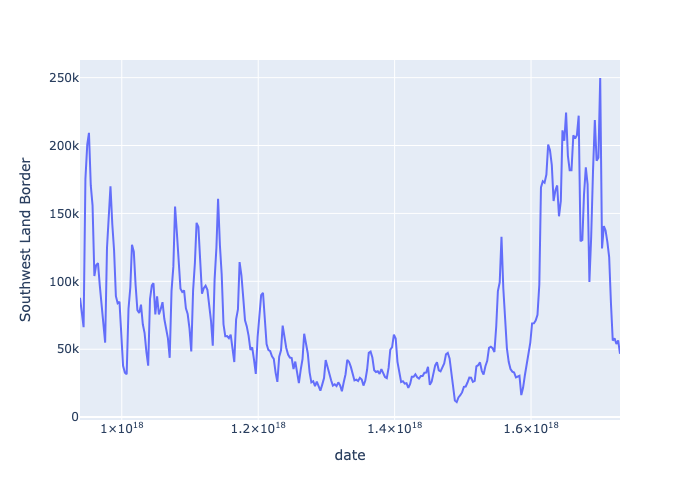

In [2]:
px.line(df, x="date", y="Southwest Land Border")

## Data on Administrations

I see two ways to show information on administrations. The first is to add a vertical line indicating when an administration starts. The second is to change the color of the line when an administration starts. Either way, we need a dataset indicating when each administration started.

In [3]:
df_administrations = pd.DataFrame(
    [
        {
            "President": "Bill Clinton",
            "Start": "1993-01-20",
        },
        {
            "President": "George W. Bush",
            "Start": "2001-01-20",
        },
        {
            "President": "Barack Obama",
            "Start": "2009-01-20",
        },
        {
            "President": "Donald Trump",
            "Start": "2017-01-20",
        },
        {
            "President": "Joe Biden",
            "Start": "2021-01-20",
        },
    ]
)

# Convert dates to datetime
df_administrations["Start"] = pd.to_datetime(df_administrations["Start"])

df_administrations

,President,Start
0,Bill Clinton,1993-01-20
1,George W. Bush,2001-01-20
2,Barack Obama,2009-01-20
3,Donald Trump,2017-01-20
4,Joe Biden,2021-01-20


## Method 1: Vertical Lines

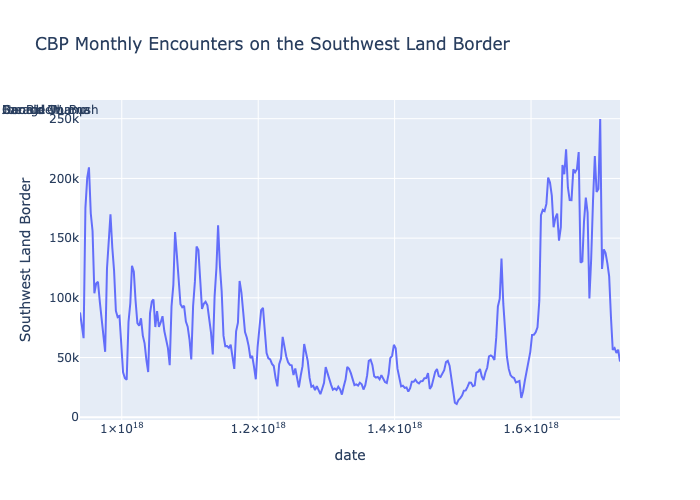

In [4]:
fig = px.line(
    df,
    x="date",
    y="Southwest Land Border",
    title="CBP Monthly Encounters on the Southwest Land Border",
)
max_y = df["Southwest Land Border"].max()

for i in range(len(df_administrations.index)):
    if i == 0:
        continue
    date = df_administrations.loc[i, "Start"]
    name = df_administrations.loc[i, "President"]
    fig.add_vline(x=date, line_color="black", line_dash="dash")
    fig.add_annotation(
        x=date,
        y=max_y,
        text=name,
        xanchor="left",
        xshift=5,
        showarrow=False,
        yanchor="bottom",
    )

fig.show()

## Method 2: Color Changes

In [5]:
def get_administration(date):
    if date < datetime(2001, 1, 20):
        return "Bill Clinton"
    elif date < datetime(2009, 1, 20):
        return "George W. Bush"
    elif date < datetime(2017, 1, 20):
        return "Barack Obama"
    elif date < datetime(2021, 1, 20):
        return "Donald Trump"
    else:
        return "Joe Biden"


df["Administration"] = df["date"].apply(get_administration)
df

,date,Coastal Border,Northern Land Border,Southwest Land Border,Administration
0,1999-10-01,740,1250,87820,Bill Clinton
1,1999-11-01,500,960,74360,Bill Clinton
2,1999-12-01,530,1010,66260,Bill Clinton
3,2000-01-01,690,1140,175380,Bill Clinton
4,2000-02-01,780,1080,200620,Bill Clinton
...,...,...,...,...,...
297,2024-07-01,220,3040,56400,Joe Biden
298,2024-08-01,240,2430,58010,Joe Biden
299,2024-09-01,340,1790,53860,Joe Biden
300,2024-10-01,320,1280,56530,Joe Biden


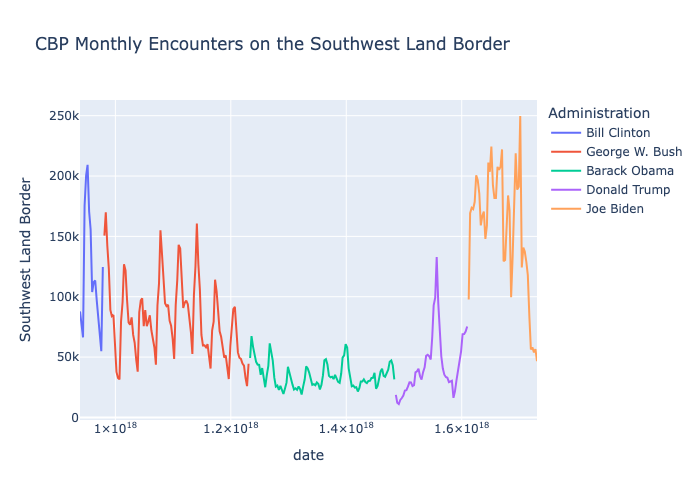

In [6]:
px.line(
    df,
    x="date",
    y="Southwest Land Border",
    title="CBP Monthly Encounters on the Southwest Land Border",
    color="Administration",
)

Perhaps because I am red-green colorblind, I prefer the version with vertical lines. Aside from the color, I think having the name directly on the graph is helpful.

## Addition to cbp_functions.py

I have added the function `get_monthly_encounters_graph` to the file cbp_functions.py. Note that it takes the optional parameter `annotate_administrations`.

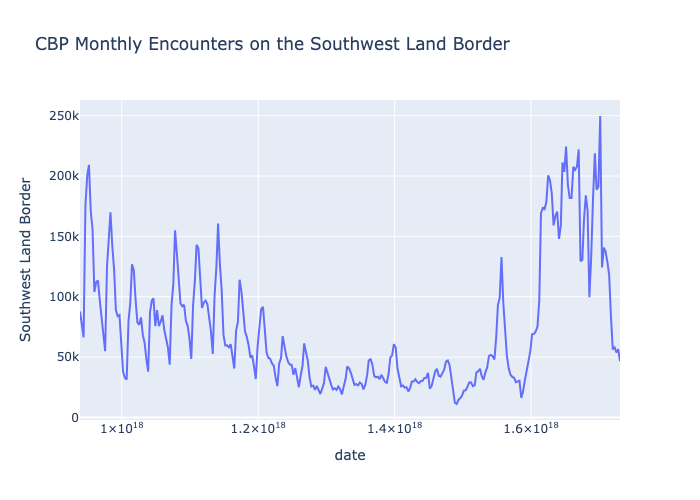

In [7]:
cbp.get_monthly_encounters_graph()

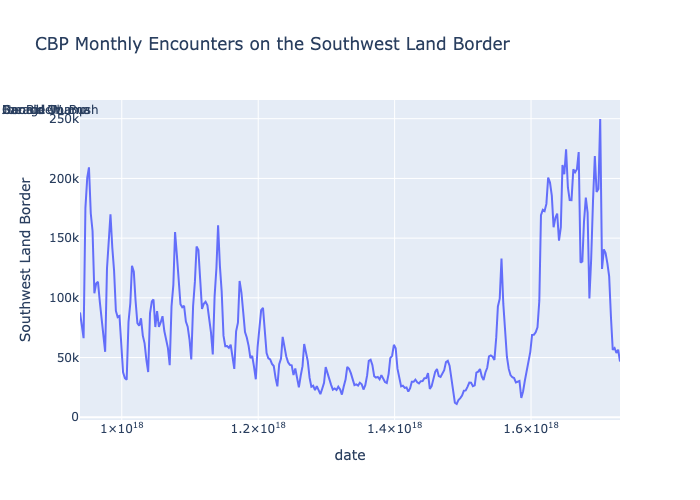

In [8]:
cbp.get_monthly_encounters_graph(annotate_administrations=True)